In [2]:
#include("ausgrid_nim_net_hd.jl")
include("wdm_hd.jl")

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1260
┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /home/trigaut/.julia/packages/Revise/tV8FE/src/Revise.jl:1309
┌ Info: Precompiling PrimalDualSDDP [7d28ce30-a49f-4585-895b-ba4811baa33d]
└ @ Base loading.jl:1260


** Primal SDDP, in Hazard Decision , with 100 passes and 0 pruning  **
Primal Bellman JuMP Models initialized
Now running SDDP passes


Progress: 100%|█████████████████████████████████████████| Time: 0:00:33


Iter 100    lb -65.03179945718958
 43.481257 seconds (147.82 M allocations: 6.824 GiB, 5.73% gc time)
** Dual SDDP with 100 passes, 4 pruning  **
Dual Bellman JuMP Models initialized
Now running SDDP passes

 Performing pruning number 1

 Performing pruning number 2

 Performing pruning number 3

 Performing pruning number 4
 20.522179 seconds (97.74 M allocations: 4.062 GiB, 5.45% gc time)


25-element Array{PrimalDualSDDP.PolyhedralFenchelTransform,1}:
 PrimalDualSDDP.PolyhedralFenchelTransform(PolyhedralFunction([0.0; 0.0; … ; 0.0; 0.0], [-10000.0, 56.21954006343386, 56.68580598166521, 57.74840078448846, 58.0505425274568, 60.02896794490185, 60.4617410753813, 61.155898444377165, 61.58324274060831, 61.90376792455685  …  64.12701954997847, 64.13059621743184, 64.13090220388067, 64.13211256593017, 64.13939852119567, 64.13983226220668, 64.14059368396845, 64.14144566110014, 64.14256223147349, 64.14374199127724]), 0.5679974452962826)
 PrimalDualSDDP.PolyhedralFenchelTransform(PolyhedralFunction([10.0; 0.0; … ; 2.125428453626555; 0.0], [62.49570140127103, 61.13358789612105, 61.17162642056183, 61.17954589905417, 61.18042492175123, 61.195635090160316, 61.195859375026615, 62.697940819968466, 61.211081512947075, 61.2174168714967  …  62.66599998387236, 61.301115915997094, 61.3017338097519, 61.6132825976809, 62.40281623749583, 62.62348094141682, 62.498392937461766, 61.3035487336046, 61

In [10]:
hour = 4
bp = collect.(unique(eachrow(D[hour].λ)))

13-element Array{Array{Float64,1},1}:
 [10.0]
 [0.0]
 [5.939297850180066]
 [6.261519502037148]
 [7.733963142032652]
 [7.167268131302306]
 [3.744339149812014]
 [5.11068354387548]
 [6.620691272036928]
 [1.5187356165244994]
 [9.900324022610429]
 [2.850345197083988]
 [8.350252058928545]

In [11]:
using Polyhedra, CDDLib

┌ Info: Precompiling Polyhedra [67491407-f73d-577b-9b50-8179a7c68029]
└ @ Base loading.jl:1260
┌ Info: Precompiling CDDLib [3391f64e-dcde-5f30-b752-e11513730f60]
└ @ Base loading.jl:1260


In [16]:
v = convexhull([[pt[1], Vinner[hour](pt, () -> Clp.Optimizer())] for pt in bp]...) #+ conichull(Ray([0., 1.])) 
p = polyhedron(v, CDDLib.Library())

Coin0506I Presolve 12 (-5) rows, 2 (0) columns and 24 (-8) elements
Clp0006I 0  Obj -60.471751 Dual inf 3.1622767 (1)
Clp0006I 6  Obj -56.188563
Clp0000I Optimal - objective value -56.188563
Coin0511I After Postsolve, objective -56.188563, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -56.18856311 - 6 iterations time 0.002, Presolve 0.00
Coin0506I Presolve 0 (-17) rows, 0 (-2) columns and 0 (-32) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value -54.791777
Coin0511I After Postsolve, objective -54.791777, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -54.79177672 - 0 iterations time 0.002, Presolve 0.00
Coin0506I Presolve 12 (-5) rows, 2 (0) columns and 24 (-8) elements
Clp0006I 0  Obj -58.165283 Dual inf 1.8781699 (1)
Clp0006I 6  Obj -55.990631
Clp0000I Optimal - objective value -55.990631
Coin0511I After Postsolve, objective -55.990631, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032

Polyhedron CDDLib.Polyhedron{Float64}:
13-element iterator of Array{Float64,1}:
 [10.0, -56.18856311010912]
 [0.0, -54.79177672437783]
 [5.939297850180066, -55.990631396457786]
 [6.261519502037148, -56.022102968786186]
 [7.733963142032652, -56.11870128081836]
 [7.167268131302306, -56.089055096141436]
 [3.744339149812014, -55.710299202478204]
 [5.11068354387548, -55.9083727401465]
 [6.620691272036928, -56.05275426041464]
 [1.5187356165244994, -55.22968522285726]
 [9.900324022610429, -56.19239492868594]
 [2.850345197083988, -55.54130884528222]
 [8.350252058928545, -56.15013798717006]

In [17]:
hrep(p)

H-representation CDDInequalityMatrix{Float64,Float64}:
13-element iterator of HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([-1.0, -36.682067089469946], 2051.352876669438)
 HalfSpace([-1.0, -19.11527627943256], 1064.9905162837563)
 HalfSpace([-1.0, -11.717997869502387], 650.2053637312428)
 HalfSpace([-1.0, -10.073277919453544], 558.0698930920205)
 HalfSpace([-1.0, -5.290206894415188], 290.97466978107116)
 HalfSpace([-1.0, -4.2731342707505], 234.48512507202932)
 HalfSpace([-1.0, -3.4681574388212932], 190.02650803288637)
 HalfSpace([-1.0, -6.898167267309784], 380.55462326075764)
 HalfSpace([-1.0, -10.238498683661136], 567.3207079998089)
 HalfSpace([-1.0, -15.05686710297967], 837.358180383004)
 HalfSpace([-1.0, -19.60411851042148], 1092.4237074180721)
 HalfSpace([1.0, 7.159290856607555], -392.27026612012077)
 HalfSpace([1.0, -26.012707906567808], 1471.61667987302)

In [18]:
Vouter = PrimalDualSDDP.PolyhedralFunction()
for h in halfspaces(p)
    λ = h.a
    γ = h.β
    if λ[end] < 0.
        PrimalDualSDDP.add_cut!(Vouter, λ[1:end-1]./(-λ[end]), γ/λ[end])
    end
end
Vouter

PolyhedralFunction([-0.027261277221944307; -0.05231417978907105; … ; -0.05100968959499013; 0.03844274896684306], [-55.92249945091849, -55.71410534252402, -55.487752342359336, -55.401022145360876, -55.002512300275036, -54.87427031653891, -54.79177672437783, -55.16749717917033, -55.41053679141006, -55.61304185365995, -55.72419422160418, -56.57299059977756])

In [19]:
Vlb = PrimalDualSDDP.remove_cut(V[hour], 1)
Vub = Vouter

PolyhedralFunction([-0.027261277221944307; -0.05231417978907105; … ; -0.05100968959499013; 0.03844274896684306], [-55.92249945091849, -55.71410534252402, -55.487752342359336, -55.401022145360876, -55.002512300275036, -54.87427031653891, -54.79177672437783, -55.16749717917033, -55.41053679141006, -55.61304185365995, -55.72419422160418, -56.57299059977756])

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


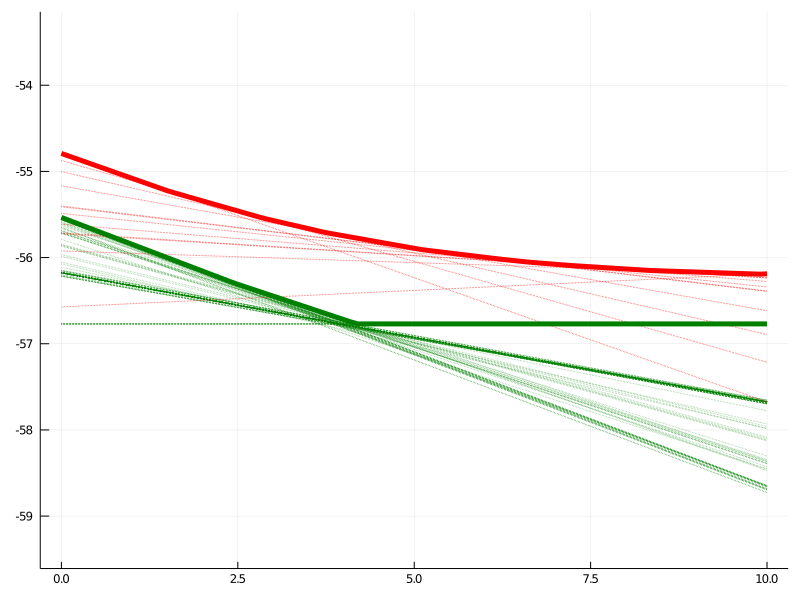

In [20]:
using Plots

xrange = collect(0.:0.1:10.)
Vubvals = Vub.(collect.(eachrow(xrange)))
Vlbvals = Vlb.(collect.(eachrow(xrange)))
Plots.plot(; leg=false, ylim = (minimum(Vlbvals)-0.05*(abs(minimum(Vlbvals))), maximum(Vubvals) + 0.03*abs(maximum(Vubvals))))
for (λ, γ) in PrimalDualSDDP.eachcut(Vlb)
    Plots.plot!(xrange, λ[1].*xrange .+ γ, color = :green, alpha = 0.5, style = :dot)
end
for (λ, γ) in PrimalDualSDDP.eachcut(Vub)
    Plots.plot!(xrange, λ[1].*xrange .+ γ, color = :red, alpha = 0.8, style = :dot)
end
Plots.plot!(xrange, Vubvals, color = :red, linewidth = 5)
Plots.plot!(xrange, Vlbvals, color = :green, linewidth = 5, size = (800, 600))